In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import torch
import transformers
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

gamma = torch.load('matrices/gamma.pt').to(device)
g = torch.load('matrices/g.pt').to(device)
concept_gamma = torch.load('matrices/concept_gamma.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
W, d = g.shape

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

/mount/studenten/arbeitsdaten-studenten1/shencg/condaenvs/xmmspatialembedding/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]


In [3]:
print(len(concept_names))
concept_names

27


['$verb \\Rightarrow 3pSg$',
 '$verb \\Rightarrow Ving$',
 '$verb \\Rightarrow Ved$',
 '$Ving \\Rightarrow 3pSg$',
 '$Ving \\Rightarrow Ved$',
 '$3pSg \\Rightarrow Ved$',
 '$verb \\Rightarrow V + able$',
 '$verb \\Rightarrow V + er$',
 '$verb \\Rightarrow V + tion$',
 '$verb \\Rightarrow V + ment$',
 '$adj \\Rightarrow un + adj$',
 '$adj \\Rightarrow adj + ly$',
 '$small \\Rightarrow big$',
 '$thing \\Rightarrow color$',
 '$thing \\Rightarrow part$',
 '$country \\Rightarrow capital$',
 '$pronoun \\Rightarrow possessive$',
 '$male \\Rightarrow female$',
 '$lower \\Rightarrow upper$',
 '$noun \\Rightarrow plural$',
 '$adj \\Rightarrow comparative$',
 '$adj \\Rightarrow superlative$',
 '$frequent \\Rightarrow infrequent$',
 '$English \\Rightarrow French$',
 '$French \\Rightarrow German$',
 '$French \\Rightarrow Spanish$',
 '$German \\Rightarrow Spanish$']

In [4]:
name_1 = ["man", "woman", "king", "queen", "King", "Queen", "roi", "homme", "femme",
        "actor", "actress", "Man", "Woman", "he", "she",
        "deux", "two", "trois", "three", "July", "juillet", "June", "juin"]

name_2 = ["read", "reading", "reads", "write", "writes", "writing", "give", "gives", "giving",
        "tell", "tells", "telling", "happen", "happens", "happening"]

ind_1 = [lrg.tokenizer.encode(word)[1] for word in name_1]

ind_2 = [lrg.tokenizer.encode(word)[1] for word in name_2]

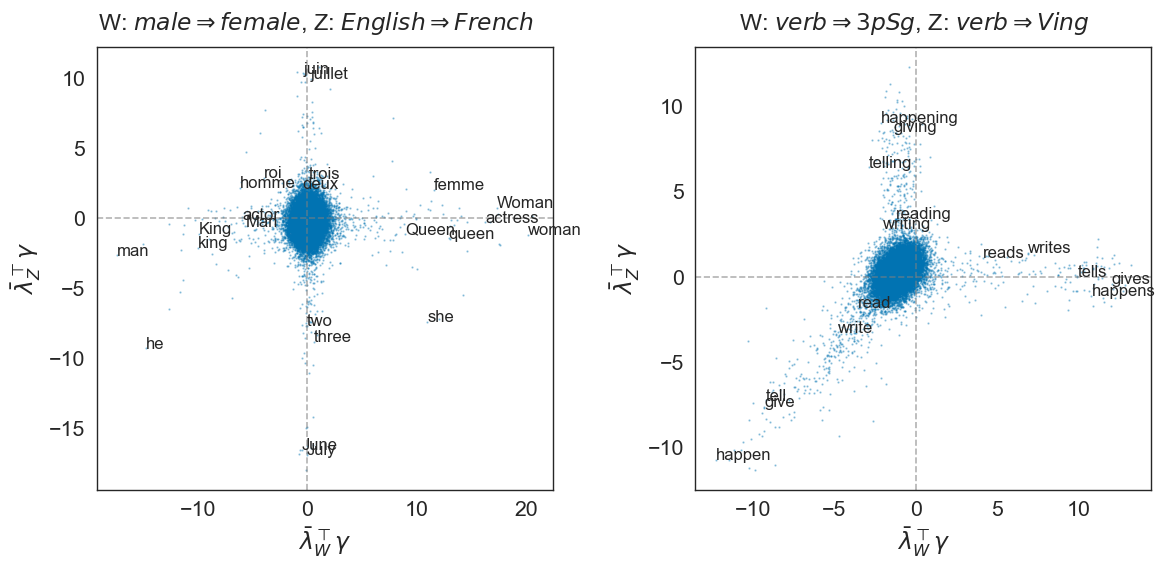

In [ ]:
lrg.sanity_check(
    g=g.cpu(), 
    concept_g=concept_g.cpu(), 
    a_i=17, 
    b_i=23, 
    c_i=0, 
    d_i=1, 
    concept_names=concept_names,
    name_1=name_1, 
    ind_1=ind_1, 
    name_2=name_2, 
    ind_2=ind_2
)